## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [2]:
bmd = pd.read_csv('bigmart_train.csv')
bmd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


1. there are mix of categorical columns and numerical columns
2. its a regrssion problem

In [3]:
# checking the information of the dataset
bmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. null values are present in 2 columns
2. item weight values can be fill by mean of the column
3. outlet size values can be fill by median of the column

In [4]:
bmd.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1. there are minimum value in Item visibility is zero so we have to treat the zeros
2. the item outlet sales data is very much spreaded as the standard deviation is high
3. Outlet_Establishment_Year column has the year values in it so we can treat this column with smaller values by subtracting the year in which data is collected from the whole column.
4. we can create the categories for the item_mrp as cheap, affordable, expensive, as per the variation

### checking the description of all the columns

In [5]:
bmd.describe(include = ['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


1. these all columns are categorical columns. 
2. item identifier has large number of unique values can we can treat these values by coverting the item identifier according to the item type
3. we can use pivot table to solve this issue of getting the exact meaning of item identifier code.

## checking the null values

In [6]:
bmd.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

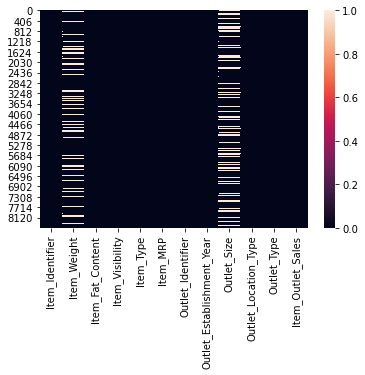

In [7]:
sns.heatmap(bmd.isnull())

1. large number of missing values are present we cant remove them as the chances will increase to lost the major part of the data. So we will treat these missing values by:

mode for categorical column (outlet size)

mean for numerical column (item weight)

# data preprocessing

### treating null values first

In [8]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values= np.nan, strategy = 'mean')
bmd['Item_Weight'] = si.fit_transform(bmd['Item_Weight'].to_numpy().reshape(-1,1))

In [9]:
bmd['Item_Weight'].isnull().sum()

0

In [10]:
# check the unique outlet size values according to the outlet type
outlet_size_mode = bmd.pivot_table(values= 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [11]:
bools = bmd['Outlet_Size'].isnull()
bmd.loc[bools, 'Outlet_Size'] = bmd.loc[bools, 'Outlet_Type'].apply(lambda x : outlet_size_mode[x])

In [12]:
bmd['Outlet_Size'].isnull().sum()

0

###  treating item identifier according to item type

In [13]:
df = bmd[['Item_Identifier','Item_Type']]
print(df.apply(lambda x: x.unique()))
print(df.head(10))

Item_Identifier    [FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...
Item_Type          [Dairy, Soft Drinks, Meat, Fruits and Vegetabl...
dtype: object
  Item_Identifier              Item_Type
0           FDA15                  Dairy
1           DRC01            Soft Drinks
2           FDN15                   Meat
3           FDX07  Fruits and Vegetables
4           NCD19              Household
5           FDP36           Baking Goods
6           FDO10            Snack Foods
7           FDP10            Snack Foods
8           FDH17           Frozen Foods
9           FDU28           Frozen Foods


1. we can see that:
    1. FD represents food items
    2. DR represnts drinks
    3. NC represnts househols or non consumable items

In [14]:
# sorting item identifier column\
bmd['Item_Identifier'] = bmd['Item_Identifier'].apply(lambda x : x[:2])
bmd['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [15]:
bmd['Item_Identifier'] = bmd['Item_Identifier'].map({'FD': 'food', 'DR': 'drinks', 'NC': 'non-consumable'})

In [16]:
bmd['Item_Identifier'].value_counts()

food              6125
non-consumable    1599
drinks             799
Name: Item_Identifier, dtype: int64

### terating item_visibility

In [17]:
(bmd['Item_Visibility'] == 0).sum()

526

#### we have to treat the 0 values by mean of the column

In [18]:
bmd['Item_Visibility'] = bmd['Item_Visibility'].replace(0, bmd['Item_Visibility'].mean())

In [19]:
bmd['Item_Visibility'].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [20]:
sum(bmd['Item_Visibility']==0)

0

In [21]:
bmd.pivot_table(values = 'Item_Visibility', columns = 'Item_Identifier', index = 'Item_Type' )

Item_Identifier,drinks,food,non-consumable
Item_Type,,,
Baking Goods,NaN,0.073762,NaN
Breads,NaN,0.070734,NaN
Breakfast,NaN,0.087527,NaN
Canned,NaN,0.071492,NaN
Dairy,0.064590,0.079088,NaN
Frozen Foods,NaN,0.069585,NaN
Fruits and Vegetables,NaN,0.073183,NaN
Hard Drinks,0.070196,NaN,NaN
Health and Hygiene,NaN,NaN,0.059413


### outlet est. year column modification


In [22]:
# we transform the values by subtracting data collection year from the outlet establishment year
# this propose us smaller scale value
# and gives us the freedom to know how much old the outlet is

bmd['Outlet_Establishment_Year'] = 2013 - bmd['Outlet_Establishment_Year']

In [23]:
bmd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,drinks,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,food,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800
4,non-consumable,8.930,Low Fat,0.066132,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,food,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,26,High,Tier 3,Supermarket Type1,2778.3834
8519,food,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,11,Small,Tier 2,Supermarket Type1,549.2850
8520,non-consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,9,Small,Tier 2,Supermarket Type1,1193.1136
8521,food,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,4,Medium,Tier 3,Supermarket Type2,1845.5976


### treating the Item_Fat_Content column

In [24]:
bmd['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
bmd['Item_Fat_Content'] = bmd['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})

In [26]:
bmd['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Exploratory Data Analysis

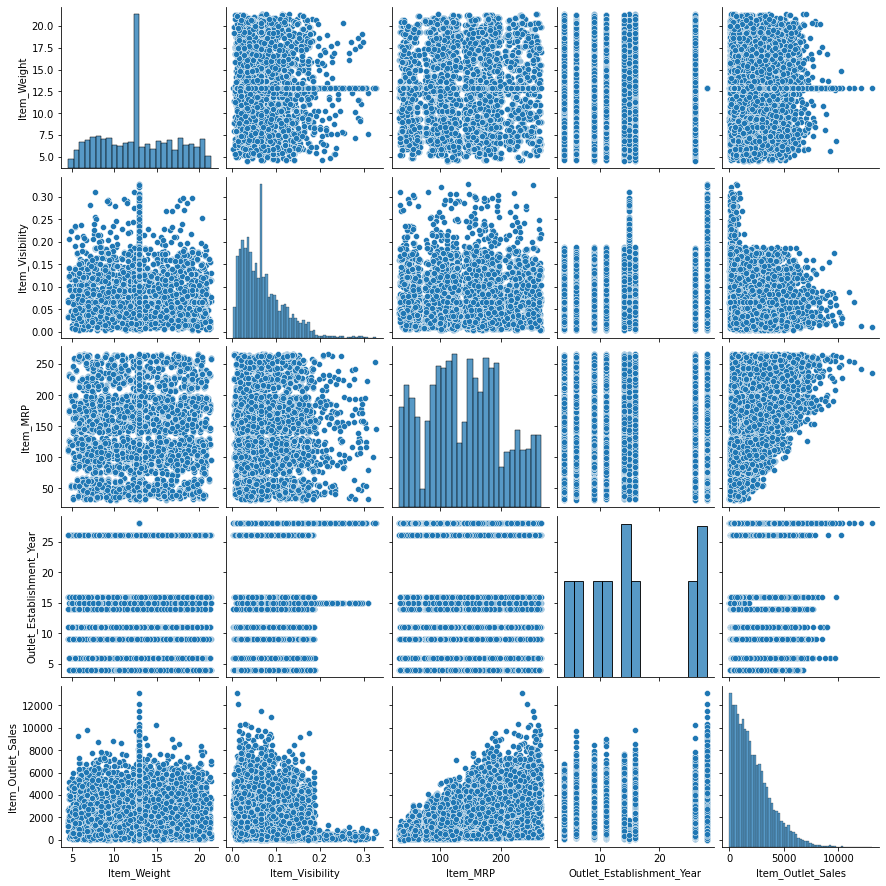

In [27]:
sns.pairplot(bmd)

## label encoding
we need to convert categorical values in numerical form...

In [28]:
bmd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,drinks,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,food,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800
4,non-consumable,8.930,Low Fat,0.066132,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,food,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,26,High,Tier 3,Supermarket Type1,2778.3834
8519,food,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,11,Small,Tier 2,Supermarket Type1,549.2850
8520,non-consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,9,Small,Tier 2,Supermarket Type1,1193.1136
8521,food,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,4,Medium,Tier 3,Supermarket Type2,1845.5976


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Item_Identifier','Item_Fat_Content','Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    bmd[col] = le.fit_transform(bmd[col])

In [30]:
bmd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,OUT049,14,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,OUT018,4,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,OUT049,14,1,0,1,2097.2700
3,1,19.200,1,0.066132,6,182.0950,OUT010,15,2,2,0,732.3800
4,2,8.930,0,0.066132,9,53.8614,OUT013,26,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,OUT013,26,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,OUT045,11,2,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,OUT035,9,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,OUT018,4,1,2,2,1845.5976


### modification of Outlet_Identifier

In [31]:
bmd['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [32]:
bmd['Outlet_Identifier'] = bmd['Outlet_Identifier'].apply(lambda x : x[4:])

In [33]:
bmd['Outlet_Identifier'].value_counts()

27    935
13    932
35    930
49    930
46    930
45    929
18    928
17    926
10    555
19    528
Name: Outlet_Identifier, dtype: int64

In [34]:
bmd

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,49,14,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,18,4,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,49,14,1,0,1,2097.2700
3,1,19.200,1,0.066132,6,182.0950,10,15,2,2,0,732.3800
4,2,8.930,0,0.066132,9,53.8614,13,26,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,13,26,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,45,11,2,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,35,9,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,18,4,1,2,2,1845.5976


In [35]:
bmd.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.063232,-0.166111,-0.046290,0.007456,0.032517,0.008551,-0.001276,0.007661,0.001136,0.011236
Item_Weight,0.063232,1.000000,-0.021157,-0.017450,0.028015,0.024756,0.008301,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.166111,-0.021157,1.000000,0.049915,-0.139434,0.006063,-0.003151,-0.001262,-0.001598,0.002199,0.018719
Item_Visibility,-0.046290,-0.017450,0.049915,1.000000,-0.036000,-0.005259,0.078355,0.097533,-0.027859,-0.179604,-0.134138
Item_Type,0.007456,0.028015,-0.139434,-0.036000,1.000000,0.032651,-0.004970,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.032517,0.024756,0.006063,-0.005259,0.032651,1.000000,-0.005020,0.000872,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,0.008551,0.008301,-0.003151,0.078355,-0.004970,-0.005020,1.000000,-0.425534,0.089216,0.122304,0.049135
Outlet_Size,-0.001276,-0.014105,-0.001262,0.097533,-0.000218,0.000872,-0.425534,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.007661,0.004088,-0.001598,-0.027859,0.003084,0.000232,0.089216,-0.480075,1.000000,0.467219,0.089367
Outlet_Type,0.001136,-0.000566,0.002199,-0.179604,0.003053,-0.001975,0.122304,-0.401373,0.467219,1.000000,0.401522


<AxesSubplot:>

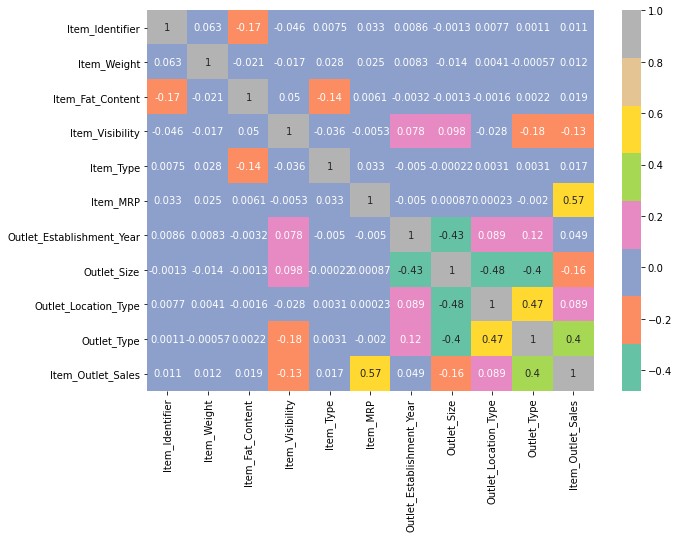

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(bmd.corr(), annot= True, cmap= 'Set2')

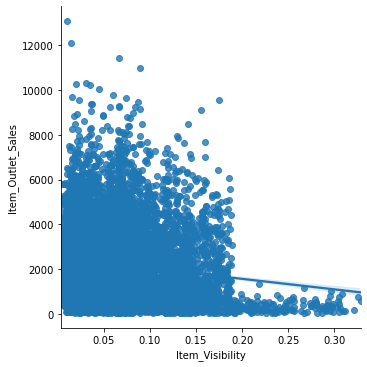

In [37]:
sns.lmplot(y = 'Item_Outlet_Sales', x = 'Item_Visibility', data = bmd)

1. the graph is depicting that visibilty is inversly propotional to sales
2. hence less the visibility, more the sales


but, this in-practical is not possible


hence those items which have more sales according to less visibility, will have to display like that, which tend to increase the visibility and increase the sale more

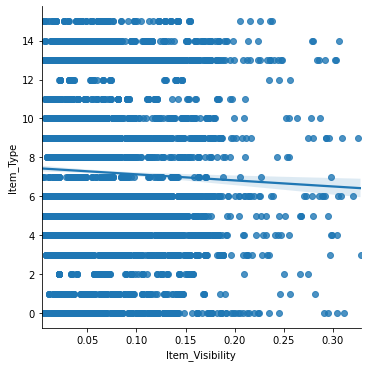

In [38]:
sns.lmplot(y = 'Item_Type', x = 'Item_Visibility', data = bmd)

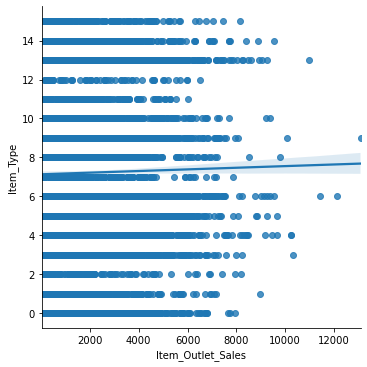

In [39]:
sns.lmplot(y = 'Item_Type', x = 'Item_Outlet_Sales', data = bmd)

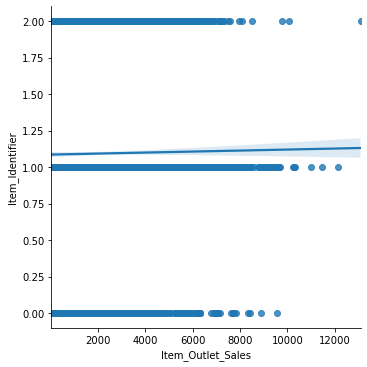

In [40]:
sns.lmplot(y = 'Item_Identifier', x = 'Item_Outlet_Sales', data = bmd)

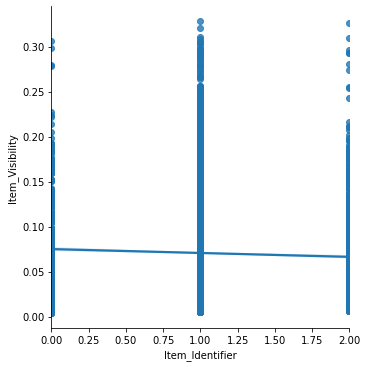

In [41]:
sns.lmplot(x = 'Item_Identifier', y = 'Item_Visibility', data = bmd)

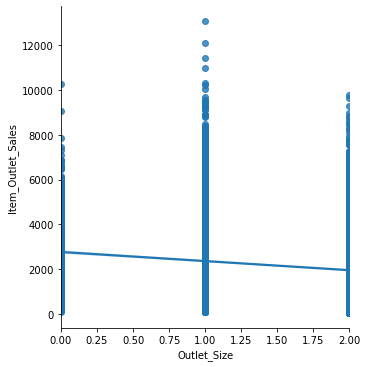

In [42]:
sns.lmplot(y = 'Item_Outlet_Sales', x = 'Outlet_Size', data = bmd)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

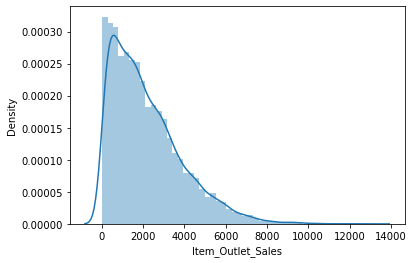

In [43]:
sns.distplot(bmd['Item_Outlet_Sales'])

### we have to normalize the output column as it contains very values

In [44]:
bmd['Item_Outlet_Sales'] = np.log(1+bmd['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

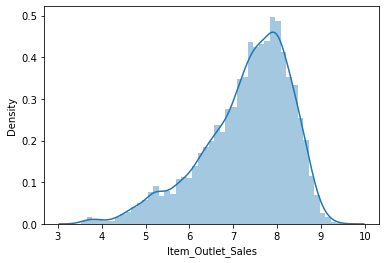

In [45]:
sns.distplot(bmd['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

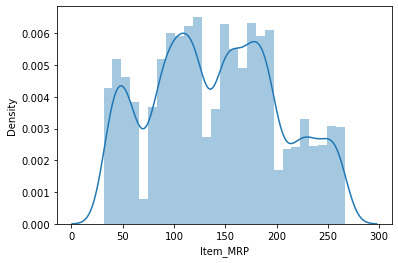

In [46]:
sns.distplot(bmd['Item_MRP']) # we have four peaks which displays four different groups of mrp

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

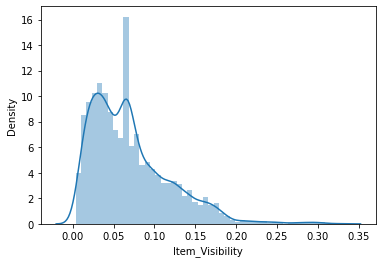

In [47]:
sns.distplot(bmd['Item_Visibility'])

In [48]:
bmd.skew()

Item_Identifier              0.114510
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.286877
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier            0.194661
Outlet_Establishment_Year    0.396641
Outlet_Size                 -0.861866
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales           -0.882266
dtype: float64

## model building

In [49]:
x =bmd.drop(['Item_Outlet_Sales'], axis =1)
x.shape

(8523, 11)

In [50]:
y = bmd['Item_Outlet_Sales']
y.shape

(8523,)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .33, random_state = 45)

In [52]:
l=[x_train, x_test, y_train, y_test]
for i in l:
    print(i.shape)

(5710, 11)
(2813, 11)
(5710,)
(2813,)


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [56]:
lr.score(x_train,y_train)

0.6019577119360243

In [57]:
predlr = lr.predict(x_test)

Model Report
MSE:  0.4302567222461752
R2 SCORE: 0.3083103588931454
[0.60553572 0.60323634 0.5668847  0.58420567 0.6119253 ]
CV SCORE:  0.5943575459200791


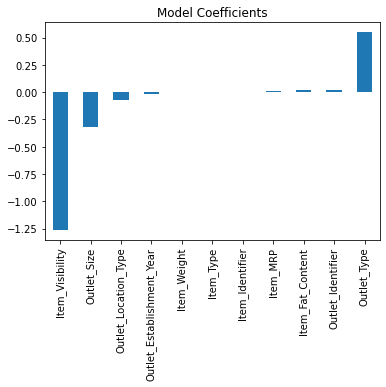

In [58]:
coef = pd.Series(lr.coef_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')
print('Model Report')
print('MSE: ', mean_squared_error(predlr,y_test))
print('R2 SCORE:', r2_score(predlr,y_test))
cv=cross_val_score(lr, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

MODEL SCORE: 0.3283053865035004
Model Report
MSE:  0.7034175036694008
R2 SCORE: -1.3731703469959742
[0.34040369 0.33586022 0.3224361  0.31166262 0.31418685]
CV SCORE:  0.32490989741668025


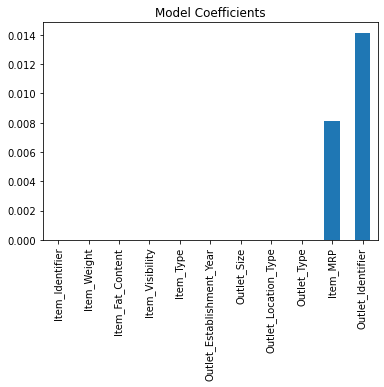

In [59]:
from sklearn.linear_model import Lasso, Ridge
ls = Lasso()
ls.fit(x_train,y_train)
print ('MODEL SCORE:',ls.score(x_train,y_train))
predls = ls.predict(x_test)
coef = pd.Series(ls.coef_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

print('Model Report')
print('MSE: ', mean_squared_error(predls,y_test))
print('R2 SCORE:', r2_score(predls,y_test))
cv=cross_val_score(ls, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

MODEL SCORE: 0.6019396610667911
Model Report
MSE:  0.43030474372944
R2 SCORE: 0.3076273451137004
[0.60545151 0.6031559  0.56697577 0.5842747  0.61189759]
CV SCORE:  0.5943510959442369


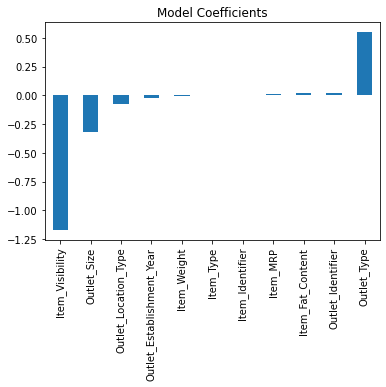

In [60]:
rg = Ridge()
rg.fit(x_train,y_train)
print ('MODEL SCORE:', rg.score(x_train,y_train))
predrg = rg.predict(x_test)
coef = pd.Series(rg.coef_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

print('Model Report')
print('MSE: ', mean_squared_error(predrg,y_test))
print('R2 SCORE:', r2_score(predrg,y_test))
cv=cross_val_score(rg, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

MODEL SCORE: 1.0
Model Report
MSE:  0.5885095379802843
R2 SCORE: 0.44685828051822585
[0.44672627 0.41181325 0.42085985 0.41789195 0.45104243]
CV SCORE:  0.4296667484228802


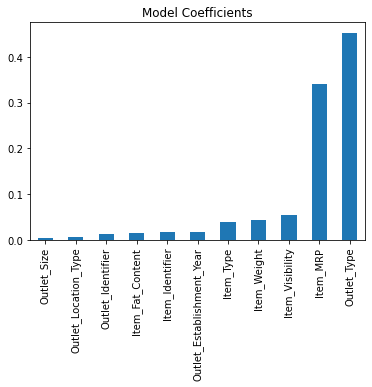

In [61]:
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
et = ExtraTreeRegressor()
et.fit(x_train,y_train)
print ('MODEL SCORE:', et.score(x_train,y_train))
predet = et.predict(x_test)
coef = pd.Series(et.feature_importances_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

print('Model Report')
print('MSE: ', mean_squared_error(predet,y_test))
print('R2 SCORE:', r2_score(predet,y_test))
cv=cross_val_score(et, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

MODEL SCORE: 1.0
Model Report
MSE:  0.5852492269836309
R2 SCORE: 0.4265955283570454
[0.42559081 0.4288734  0.42784847 0.39879043 0.50648134]
CV SCORE:  0.43751689093792284


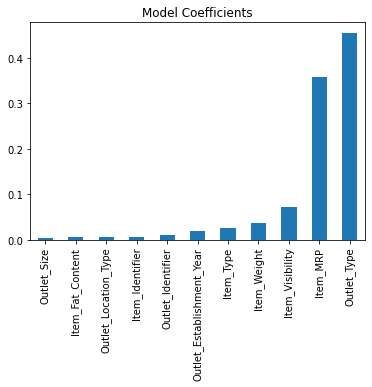

In [62]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print ('MODEL SCORE:', dtr.score(x_train,y_train))
preddtr = dtr.predict(x_test)
coef = pd.Series(dtr.feature_importances_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

print('Model Report')
print('MSE: ', mean_squared_error(preddtr,y_test))
print('R2 SCORE:', r2_score(preddtr,y_test))
cv=cross_val_score(dtr, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

MODEL SCORE: 0.9592447273227874
Model Report
MSE:  0.3126667203926242
R2 SCORE: 0.6001115545315727
[0.69960793 0.69044523 0.69420062 0.69077381 0.72371176]
CV SCORE:  0.699747870766937


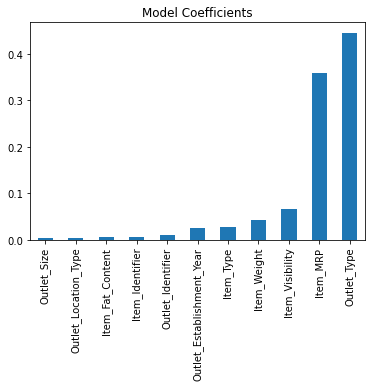

In [63]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
print ('MODEL SCORE:', rfr.score(x_train,y_train))
predrfr = rfr.predict(x_test)
coef = pd.Series(rfr.feature_importances_,x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

print('Model Report')
print('MSE: ', mean_squared_error(predrfr,y_test))
print('R2 SCORE:', r2_score(predrfr,y_test))
cv=cross_val_score(rfr, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

In [64]:
predrfr

array([8.33245842, 7.11077093, 6.38577855, ..., 7.38963635, 6.97012309,
       6.96920098])

In [65]:
y_test

4454    8.134828
4743    7.382068
3017    6.516372
5753    7.416681
1478    8.345737
          ...   
4447    5.233373
3706    8.401529
3319    7.869247
2623    7.060892
8017    6.642056
Name: Item_Outlet_Sales, Length: 2813, dtype: float64

In [66]:
# our best model is Random Forest Regressor

### saving the model

In [67]:
import joblib
joblib.dump(rfr, 'rfrfile.obj')

['rfrfile.obj']

In [68]:
df = pd.read_csv('bigmart_test.csv')

In [69]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [70]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [71]:
si = SimpleImputer(missing_values= np.nan, strategy = 'mean')
df['Item_Weight'] = si.fit_transform(df['Item_Weight'].to_numpy().reshape(-1,1))


outlet_size_mode = df.pivot_table(values= 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

bools = df['Outlet_Size'].isnull()
df.loc[bools, 'Outlet_Size'] = df.loc[bools, 'Outlet_Type'].apply(lambda x : outlet_size_mode[x])

In [72]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x : x[:2])
df['Item_Identifier'].unique()

df['Item_Identifier'] = df['Item_Identifier'].map({'FD': 'food', 'DR': 'drinks', 'NC': 'non-consumable'})

df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean())

In [73]:
df['Outlet_Establishment_Year'] = 2013 - df['Outlet_Establishment_Year']

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular','low fat':'Low Fat'})

le = LabelEncoder()
cat_col = ['Item_Identifier','Item_Fat_Content','Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    
df['Outlet_Identifier'] = df['Outlet_Identifier'].apply(lambda x : x[4:])

In [74]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,20.750000,0,0.007565,13,107.8622,49,14,1,0,1
1,1,8.300000,1,0.038428,4,87.3198,17,6,2,1,1
2,2,14.600000,0,0.099575,11,241.7538,10,15,2,2,0
3,1,7.315000,0,0.015388,13,155.0340,17,6,2,1,1
4,1,12.695633,1,0.118599,4,234.2300,27,28,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,1,0.013496,13,141.3154,46,16,2,0,1
5677,1,7.600000,1,0.142991,15,169.1448,18,4,1,2,2
5678,2,10.000000,0,0.073529,8,118.7440,45,11,2,1,1
5679,1,15.300000,1,0.065684,3,214.6218,17,6,2,1,1


In [75]:
x_test2 = df

In [76]:
rfr_joblib = joblib.load('rfrfile.obj')

In [77]:
test_data_prediction = rfr_joblib.predict(x_test2)

In [78]:
test_data_prediction

array([7.30549459, 7.21657382, 6.40394503, ..., 7.42809492, 8.40477644,
       7.17286162])

In [79]:
tdp = pd.DataFrame(test_data_prediction, 
             columns=['Predictions'])

In [80]:
tdp

,Predictions
0,7.305495
1,7.216574
2,6.403945
3,7.532871
4,8.581771
...,...
5676,7.640487
5677,7.864474
5678,7.428095
5679,8.404776
